In [1]:
#Librerías para la carga, análisis y preprocesamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# División de los datos de entrenamiento y prueba
training_files_1 = ['OpportunityUCIDataset/dataset/S1-ADL1.dat',
                 'OpportunityUCIDataset/dataset/S1-ADL2.dat',
                 'OpportunityUCIDataset/dataset/S1-ADL3.dat',
                 'OpportunityUCIDataset/dataset/S1-Drill.dat']
training_files_2 = ['OpportunityUCIDataset/dataset/S2-ADL1.dat',
                 'OpportunityUCIDataset/dataset/S2-ADL2.dat',
                 'OpportunityUCIDataset/dataset/S2-ADL3.dat',
                 'OpportunityUCIDataset/dataset/S2-Drill.dat']
training_files_3 = ['OpportunityUCIDataset/dataset/S3-ADL1.dat',
                'OpportunityUCIDataset/dataset/S3-ADL2.dat',
                'OpportunityUCIDataset/dataset/S3-ADL3.dat',
                'OpportunityUCIDataset/dataset/S3-Drill.dat']
test_files = ['OpportunityUCIDataset/dataset/S4-ADL1.dat',
                'OpportunityUCIDataset/dataset/S4-ADL2.dat',
                'OpportunityUCIDataset/dataset/S4-ADL3.dat',
                'OpportunityUCIDataset/dataset/S4-Drill.dat']

In [3]:
# Leer columnas del dataset que se ecuentran en otro archivo
col_names = []
with open('col_names.txt','r') as f:
    lines = f.read().splitlines()
    for line in lines:
        col_names.append(line)

In [4]:
# Leer datos de entrenamiento
df_training_1 = pd.DataFrame()
for i, file in enumerate(training_files_1):
    print(file,"se está leyendo...")
    file_data = pd.read_table(file, header=None, sep='\s+')
    file_data.columns = col_names      
    df_training_1 = df_training_1._append(file_data, ignore_index=True)
df_training_1.reset_index(drop=True, inplace=True)
print("Lectura hecha!")

df_training_2 = pd.DataFrame()
for i, file in enumerate(training_files_2):
    print(file,"se está leyendo...")
    file_data = pd.read_table(file, header=None, sep='\s+')
    file_data.columns = col_names      
    df_training_2 = df_training_2._append(file_data, ignore_index=True)
df_training_2.reset_index(drop=True, inplace=True)
print("Lectura hecha!")

df_training_3 = pd.DataFrame()
for i, file in enumerate(training_files_3):
    print(file,"se está leyendo...")
    file_data = pd.read_table(file, header=None, sep='\s+')
    file_data.columns = col_names      
    df_training_3 = df_training_3._append(file_data, ignore_index=True)
df_training_3.reset_index(drop=True, inplace=True)
print("Lectura hecha!")


OpportunityUCIDataset/dataset/S1-ADL1.dat se está leyendo...
OpportunityUCIDataset/dataset/S1-ADL2.dat se está leyendo...
OpportunityUCIDataset/dataset/S1-ADL3.dat se está leyendo...
OpportunityUCIDataset/dataset/S1-Drill.dat se está leyendo...
Lectura hecha!
OpportunityUCIDataset/dataset/S2-ADL1.dat se está leyendo...
OpportunityUCIDataset/dataset/S2-ADL2.dat se está leyendo...
OpportunityUCIDataset/dataset/S2-ADL3.dat se está leyendo...
OpportunityUCIDataset/dataset/S2-Drill.dat se está leyendo...
Lectura hecha!
OpportunityUCIDataset/dataset/S3-ADL1.dat se está leyendo...
OpportunityUCIDataset/dataset/S3-ADL2.dat se está leyendo...
OpportunityUCIDataset/dataset/S3-ADL3.dat se está leyendo...
OpportunityUCIDataset/dataset/S3-Drill.dat se está leyendo...
Lectura hecha!


In [5]:
# Leer datos de prueba
df_test = pd.DataFrame()
for i, file in enumerate(test_files):
    print(file,"se está leyendo...")
    file_data = pd.read_table(file, header=None, sep='\s+')
    file_data.columns = col_names      
    df_test = df_test._append(file_data, ignore_index=True)
df_test.reset_index(drop=True, inplace=True)
print("Lectura hecha!")

OpportunityUCIDataset/dataset/S4-ADL1.dat se está leyendo...
OpportunityUCIDataset/dataset/S4-ADL2.dat se está leyendo...
OpportunityUCIDataset/dataset/S4-ADL3.dat se está leyendo...
OpportunityUCIDataset/dataset/S4-Drill.dat se está leyendo...
Lectura hecha!


In [6]:
def segmentation_to_simple_activities(df):
    # Segmentación de la base de datos a solo las simples (Parado, caminando, sentado, acostado)
    df = df.drop(['HL_Activity','LL_Left_Arm','LL_Left_Arm_Object','LL_Right_Arm',
                  'LL_Right_Arm_Object', 'ML_Both_Arms'], axis = 1)
    # Se eliminan los ejemplos que no entran en alguna de las 4 actividades
    df = df[df['Locomotion'] != 0]
    return df

In [7]:
df_training_1 = segmentation_to_simple_activities(df_training_1)
df_training_2 = segmentation_to_simple_activities(df_training_2)
df_training_3 = segmentation_to_simple_activities(df_training_3)
df_test = segmentation_to_simple_activities(df_test)

In [8]:
def mapping_new_labels(df):
    # Se mapean los nuevos labels
    mapping = {1:1, 2:2, 4:3, 5:4}
    df['Locomotion'] = df['Locomotion'].map(mapping)
    return df

In [9]:
df_training_1 = mapping_new_labels(df_training_1)
df_training_2 = mapping_new_labels(df_training_2)
df_training_3 = mapping_new_labels(df_training_3)
df_test = mapping_new_labels(df_test)

In [10]:
def cut_no_body_sensors(df):
    df_labels = df['Locomotion']
    df = df.drop(df.iloc[:,134:243], axis=1)
    
    three_axis_columns = [col for col in df.columns if 'X' in col or 'Y' in col or 'Z' in col]
    df = df[three_axis_columns]
    df = df.assign(label=df_labels)

    return df

In [11]:
df_training_1 = cut_no_body_sensors(df_training_1)
df_training_2 = cut_no_body_sensors(df_training_2)
df_training_3 = cut_no_body_sensors(df_training_3)
df_test = cut_no_body_sensors(df_test)

In [12]:
df_test.columns[111]

'label'

In [13]:
def handle_missing_values(df):
    # Manejo de valores nulos por medio de imputación hacia delante
    limit = df.shape[1]*0.9
    df = df.dropna(axis='rows',thresh = limit)
    df.iloc[0] = df.iloc[0].fillna(0)
    df = df.ffill()
    return df

In [14]:
df_training_1 = handle_missing_values(df_training_1)
df_training_2 = handle_missing_values(df_training_2)
df_training_3 = handle_missing_values(df_training_3)
df_test = handle_missing_values(df_test)

In [15]:
def feature_extraction(df):
    window_size = 90
    total_sensors = int(df.shape[1]/3)
    total_samples = df.shape[0]//window_size
    
    first_column_from_sensor = 0
    
    resultados_caracteristicas = {
        'mode label': [],
    }
    
    for i in range(total_sensors):
        start_rows = 0
        end_rows = window_size
            
        for j in range(total_samples):
            col_x = df.iloc[start_rows:end_rows, first_column_from_sensor]
            col_y = df.iloc[start_rows:end_rows, first_column_from_sensor+1]
            col_z = df.iloc[start_rows:end_rows, first_column_from_sensor+2]

            # Estadísticos juntando los 3 ejes
            magnitud = np.sqrt(col_x**2 + col_y**2 + col_z**2)
            media_magnitud = np.mean(magnitud)
            std_magnitud = np.std(magnitud)
            auc_magnitud = np.sum(magnitud)

            # Estadísticos de cada eje
            mean_axis_x = col_x.mean()
            std_axis_x = col_x.std()
            max_axis_x = col_x.max()

            mean_axis_y = col_y.mean()
            std_axis_y = col_y.std()
            max_axis_y = col_y.max()

            mean_axis_z = col_z.mean()
            std_axis_z = col_z.std()
            max_axis_z = col_z.max()

            # Nombre de cada sensor
            sensor_name = df.columns[first_column_from_sensor][:-1]

            # Nombres estadísticos eje X
            mean_axis_x_name = 'mean ' + df.columns[first_column_from_sensor]
            std_axis_x_name = 'std ' + df.columns[first_column_from_sensor]
            max_axis_x_name = 'max ' + df.columns[first_column_from_sensor]

            # Nombres estadísticos eje Y
            mean_axis_y_name = 'mean ' + df.columns[first_column_from_sensor+1]
            std_axis_y_name = 'std ' + df.columns[first_column_from_sensor+1]
            max_axis_y_name = 'max ' + df.columns[first_column_from_sensor+1]

            # Nombres estadísticos eje Z
            mean_axis_z_name = 'mean ' + df.columns[first_column_from_sensor+2]
            std_axis_z_name = 'std ' + df.columns[first_column_from_sensor+2]
            max_axis_z_name = 'max ' + df.columns[first_column_from_sensor+2]
            
            # Nombres estadísticos de los 3 ejes 
            mean_magnitude_name = 'MM ' + sensor_name
            std_magnitude_name = 'StdM ' + sensor_name
            AUC_magnitude_name = 'AUCM ' + sensor_name


            if mean_magnitude_name not in resultados_caracteristicas:
                resultados_caracteristicas[mean_magnitude_name] = []
            if std_magnitude_name not in resultados_caracteristicas:
                resultados_caracteristicas[std_magnitude_name] = []
            if AUC_magnitude_name not in resultados_caracteristicas:
                resultados_caracteristicas[AUC_magnitude_name] = []
            if mean_axis_x_name not in resultados_caracteristicas:
                resultados_caracteristicas[mean_axis_x_name] = []
            if std_axis_x_name not in resultados_caracteristicas:
                resultados_caracteristicas[std_axis_x_name] = []
            if max_axis_x_name not in resultados_caracteristicas:
                resultados_caracteristicas[max_axis_x_name] = []
            if mean_axis_y_name not in resultados_caracteristicas:
                resultados_caracteristicas[mean_axis_y_name] = []
            if std_axis_y_name not in resultados_caracteristicas:
                resultados_caracteristicas[std_axis_y_name] = []
            if max_axis_y_name not in resultados_caracteristicas:
                resultados_caracteristicas[max_axis_y_name] = []
            if mean_axis_z_name not in resultados_caracteristicas:
                resultados_caracteristicas[mean_axis_z_name] = []
            if std_axis_z_name not in resultados_caracteristicas:
                resultados_caracteristicas[std_axis_z_name] = []
            if max_axis_z_name not in resultados_caracteristicas:
                resultados_caracteristicas[max_axis_z_name] = []
    
            resultados_caracteristicas[mean_magnitude_name].append(media_magnitud)
            resultados_caracteristicas[std_magnitude_name].append(std_magnitud)
            resultados_caracteristicas[AUC_magnitude_name].append(auc_magnitud)
            resultados_caracteristicas[mean_axis_x_name].append(mean_axis_x)
            resultados_caracteristicas[std_axis_x_name].append(std_axis_x)
            resultados_caracteristicas[max_axis_x_name].append(max_axis_x)
            resultados_caracteristicas[mean_axis_y_name].append(mean_axis_y)
            resultados_caracteristicas[std_axis_y_name].append(std_axis_y)
            resultados_caracteristicas[max_axis_y_name].append(max_axis_y)
            resultados_caracteristicas[mean_axis_z_name].append(mean_axis_z)
            resultados_caracteristicas[std_axis_z_name].append(std_axis_z)
            resultados_caracteristicas[max_axis_z_name].append(max_axis_z)
            
            start_rows = end_rows
            end_rows += 90
        
        first_column_from_sensor += 3
        
    start_rows = 0
    end_rows = window_size
    for k in range(total_samples):
        mode = df.iloc[start_rows:end_rows, 111].mode()[0]
        resultados_caracteristicas['mode label'].append(mode)
        
        start_rows = end_rows
        end_rows += 90
    
    df = pd.DataFrame(resultados_caracteristicas)

    return df


In [16]:
df_training_1 = feature_extraction(df_training_1)
df_training_2 = feature_extraction(df_training_2)
df_training_3 = feature_extraction(df_training_3)
df_test = feature_extraction(df_test)

In [17]:
def scale_training_data(df_1, df_2, df_3):
    df = pd.concat([df_1, df_2, df_3], ignore_index=True)
    
    labels = df.iloc[:, 0]
    data = df.iloc[:, 1:]
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    scaled_df.insert(0, df.columns[0], labels)
    
    return scaled_df, scaler

In [18]:
def scale_test_data(df, scaler):
    labels = df.iloc[:, 0]
    data = df.iloc[:, 1:]
    
    scaled_data = scaler.transform(data)
    
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    scaled_df.insert(0, df.columns[0], labels)

    return scaled_df

In [19]:
df_training, scaler = scale_training_data(df_training_1, df_training_2, df_training_3)
df_test = scale_test_data(df_test, scaler)

In [20]:
def select_best_features(df):
    from sklearn.feature_selection import SelectKBest, f_classif

    X = df.iloc[:, 1:]  
    y = df.iloc[:, 0]   

    k_best_features = 300  
    selector = SelectKBest(score_func=f_classif, k=k_best_features)

    X_best = selector.fit_transform(X, y)

    selected_columns = X.columns[selector.get_support()]
    X_best = pd.DataFrame(X_best, columns=selected_columns)

    X_best.insert(0, df.columns[0], y)

    return X_best

In [21]:
df_training = select_best_features(df_training)

In [22]:
# De los features seleccionados, aplicarlos en los datos de prueba

columns_training = df_training.columns.tolist()
for column in df_test.columns:
    if column not in columns_training:
        df_test = df_test.drop(column, axis = 1)

In [23]:
def transform_using_lda(df):
    labels = df.iloc[:, 0]
    features = df.iloc[:, 1:]

    lda = LinearDiscriminantAnalysis(n_components=3)
    features_lda = lda.fit_transform(features, labels)

    print("Varianza explicada por cada componente:", lda.explained_variance_ratio_)
    
    columns_lda = ['Component_1', 'Component_2', 'Component_3']
    df_lda = pd.DataFrame(data=features_lda, columns=columns_lda)
    df_lda['labels'] = labels
    return df_lda

In [24]:
df_training = transform_using_lda(df_training)
df_test = transform_using_lda(df_test)

Varianza explicada por cada componente: [0.60286357 0.31560239 0.08153403]
Varianza explicada por cada componente: [0.73912645 0.21218441 0.04868914]


In [32]:
def print_3d_chart(df):
    %matplotlib notebook

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    unic_labels = df['labels'].unique()

    for label, color in zip(unic_labels, colors):
        index = df['labels'] == label
        ax.scatter(df.loc[index, 'Component_1'],
                   df.loc[index, 'Component_2'],
                   df.loc[index, 'Component_3'],
                   c=color,
                   label=label,
                   s=50,
                   alpha=0.7)

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title('3D Display with LDA')
    ax.legend()

    plt.show()


<IPython.core.display.Javascript object>


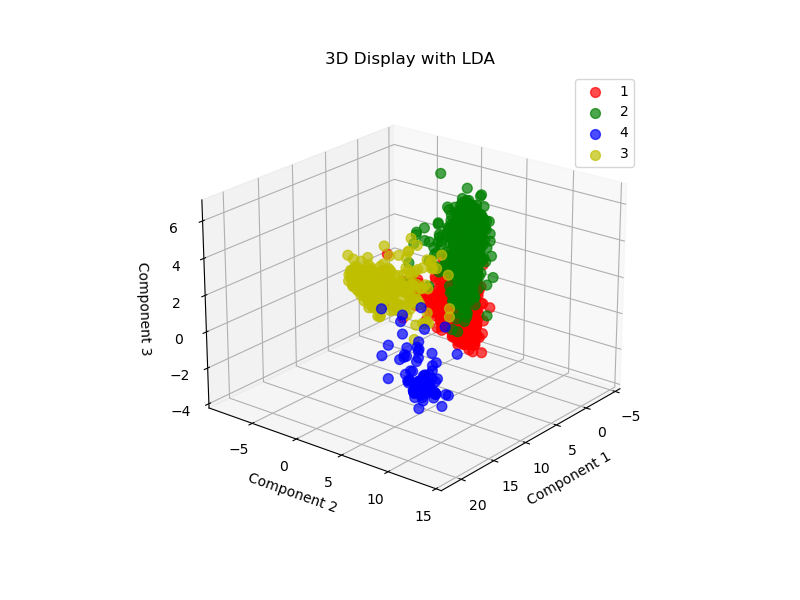

In [33]:
print_3d_chart(df_training)

In [27]:
locomotion = pd.Series([0,0,0,0],index=['Stan', 'Walk', 'Sit', 'Lie'])
for value in df_training.loc[:,'labels']:
    if 1 <= value <= 4:
        if value == 1:
            locomotion['Stan'] += 1
        elif value == 2:
            locomotion['Walk'] += 1
        elif value == 3:
            locomotion['Sit'] += 1
        elif value == 4:
            locomotion['Lie'] += 1

display(locomotion)

Stan    2311
Walk    1292
Sit      831
Lie      127
dtype: int64

In [28]:
X_train = df_training.iloc[:, :3]  
y_train = df_training.iloc[:, 3]   

X_test = df_test.iloc[:, :3]  
y_test = df_test.iloc[:, 3]   

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
y_pred = rf_classifier.predict(X_test)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=rf_classifier.classes_, columns=rf_classifier.classes_)
print("Matriz de Confusión:\n", conf_matrix_df)

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96       667
           2       0.90      0.97      0.93       282
           3       0.99      0.95      0.97       196
           4       1.00      0.97      0.99        35

    accuracy                           0.96      1180
   macro avg       0.97      0.96      0.96      1180
weighted avg       0.96      0.96      0.96      1180

Matriz de Confusión:
      1    2    3   4
1  636   31    0   0
2    9  273    0   0
3    8    1  187   0
4    0    0    1  34


In [31]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

perceptron_model = Perceptron(class_weight='balanced', max_iter=1000, eta0=0.1)
perceptron_model.fit(X_train, y_train)

y_pred = perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test, y_pred))


Accuracy: 0.9483050847457627
Confusion Matrix:
[[625  41   1   0]
 [ 18 264   0   0]
 [  0   1 195   0]
 [  0   0   0  35]]
              precision    recall  f1-score   support

           1       0.97      0.94      0.95       667
           2       0.86      0.94      0.90       282
           3       0.99      0.99      0.99       196
           4       1.00      1.00      1.00        35

    accuracy                           0.95      1180
   macro avg       0.96      0.97      0.96      1180
weighted avg       0.95      0.95      0.95      1180

